In [1]:
# Anita Sehn Brose

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score

In [3]:
df = pd.read_csv('heart.csv') #import the dataframe

In [4]:
df.corr() #view the dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [5]:
# Created a graphic that shows the correlation between the rows

cmap =sns.diverging_palette(5, 250, as_cmap=True)

def magnify():                        # defined the style of the graphic 
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
df.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

C:\Users\AnitaSehnBrose\AppData\Local\Temp\ipykernel_6180\4001788751.py:16: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap, axis=1)\


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.27,0.22,0.12,-0.13,-0.39,0.09,0.21,-0.17,0.27,0.07,-0.23
sex,-0.10,1.00,-0.04,-0.08,-0.20,0.03,-0.06,-0.05,0.14,0.08,-0.03,0.11,0.20,-0.28
cp,-0.07,-0.04,1.00,0.04,-0.08,0.08,0.04,0.31,-0.40,-0.17,0.13,-0.18,-0.16,0.43
trestbps,0.27,-0.08,0.04,1.00,0.13,0.18,-0.12,-0.04,0.06,0.19,-0.12,0.10,0.06,-0.14
chol,0.22,-0.20,-0.08,0.13,1.00,0.03,-0.15,-0.02,0.07,0.06,-0.01,0.07,0.10,-0.10
fbs,0.12,0.03,0.08,0.18,0.03,1.00,-0.10,-0.01,0.05,0.01,-0.06,0.14,-0.04,-0.04
restecg,-0.13,-0.06,0.04,-0.12,-0.15,-0.10,1.00,0.05,-0.07,-0.05,0.09,-0.08,-0.02,0.13
thalach,-0.39,-0.05,0.31,-0.04,-0.02,-0.01,0.05,1.00,-0.38,-0.35,0.40,-0.21,-0.10,0.42
exang,0.09,0.14,-0.40,0.06,0.07,0.05,-0.07,-0.38,1.00,0.31,-0.27,0.11,0.20,-0.44
oldpeak,0.21,0.08,-0.17,0.19,0.06,0.01,-0.05,-0.35,0.31,1.00,-0.58,0.22,0.20,-0.44


In [6]:
# split the dataset in train and test 
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1],
                                                    df.iloc[:, -1],
                                                    test_size=0.2)

In [7]:
# Normalizing variables with the support of Logistic Regression Model Tuning with scikit-learn — Part 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
logistic_regression = LogisticRegression()
preds = logistic_regression.fit(X_train, y_train).predict(X_test)

In [9]:
# Saw the shape of the variables
print(y_train.shape, X_train.shape, X_test.shape, y_test.shape, preds.shape)

(820,) (820, 13) (205, 13) (205,) (205,)


In [10]:
#  Calculating the accuracy of the model
logistic_acc = accuracy_score(y_test, preds)
print('Logistic Accuracy: {}'.format(logistic_acc))

Logistic Accuracy: 0.8146341463414634


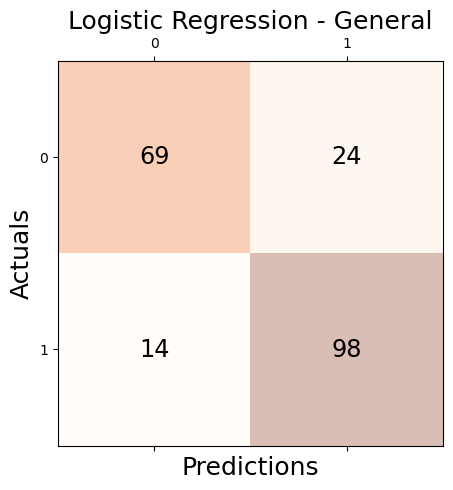

In [11]:
# Calculated the confusion matrix

conf_matrix = confusion_matrix(y_test, preds.round(0).astype(int))

# Printed the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logistic Regression - General', fontsize=18)
plt.show()



In [12]:
# Calculated the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        93
           1       0.80      0.88      0.84       112

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [13]:
#  Filtred the dataframe, leaving only the data which can be taken from wearables
wearable_df = df[['age', 'sex', 'trestbps', 'fbs', 'restecg', 'thalach',
                 'oldpeak', 'slope', 'target']]

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
# split the dataset in train and test again
X_train, X_test, y_train, y_test = train_test_split(wearable_df.iloc[:, :-1],
                                                    wearable_df.iloc[:, -1],
                                                    test_size=0.3)

# printed the shape of the variables
print(y_train.shape, X_train.shape, X_test.shape, y_test.shape)

(717,) (717, 8) (308, 8) (308,)


In [16]:
# Normalizing variables with the support of Logistic Regression Model Tuning with scikit-learn — Part 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
pred2 = logistic_regression.fit(X_train, y_train).predict(X_test)

In [18]:
# Calculated the accuracy of the model
logistic_acc = accuracy_score(y_test, pred2)
print('Logistic Accuracy: {}'.format(logistic_acc))

Logistic Accuracy: 0.7564935064935064


In [19]:
#  The acuracy of the model was reducted when the dataset was filtered, but that was expected.

In [20]:
# Calculated the precision of the model
from sklearn.metrics import precision_score
logistic_precision = precision_score(y_test, 
                                     pred2)
print('Logistic Precision: {}'.format(logistic_precision))

Logistic Precision: 0.7126436781609196


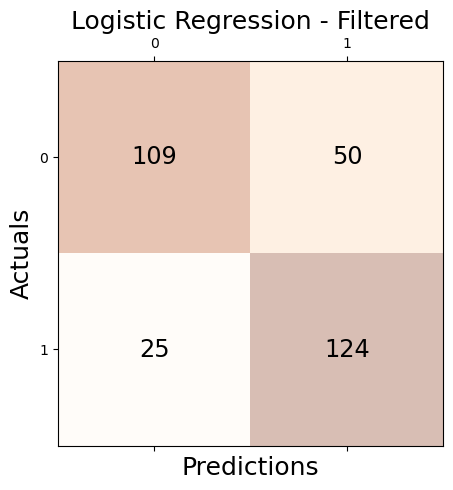

In [21]:
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_test,pred2.round(0).astype(int))
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logistic Regression - Filtered', fontsize=18)
plt.show()

In [22]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.81      0.69      0.74       159
           1       0.71      0.83      0.77       149

    accuracy                           0.76       308
   macro avg       0.76      0.76      0.76       308
weighted avg       0.76      0.76      0.76       308

